# 데이터셋 준비

In [5]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


In [12]:
from google.cloud import vision
import io
import os
 
img_dir = os.getenv('HOME')+'/aiffel/Ex_15/image'
file_list = os.listdir(img_dir)
file_list

['7.jpg', '2.jpg', '4.jpg', '1.jpg', '5.jpg', '6.jpg', '3.jpg']

# 3가지 OCR

## 1. Google OCR API

In [6]:
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [13]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
# !ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/Ex_15/my_google_api_key.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for file in file_list:
    print(f'[{file}]')
    detect_text(os.path.join(img_dir, file))
    print()

[7.jpg]


PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #552992289758 by visiting https://console.developers.google.com/billing/enable?project=552992289758 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=552992289758"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/552992289758"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

## 2. keras-ocr

In [8]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [14]:
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

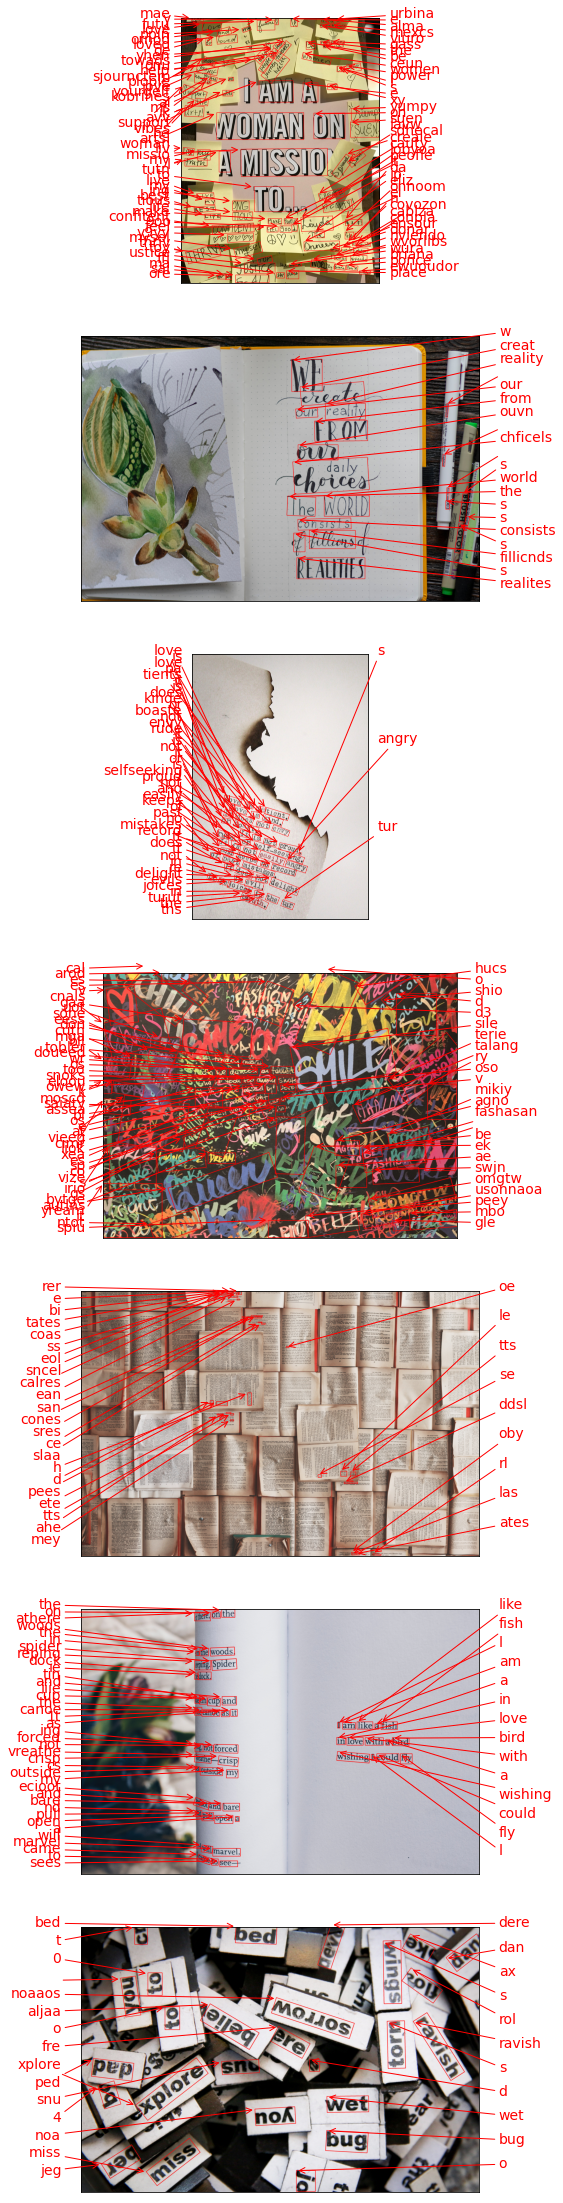

In [16]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 3. Tesseract

In [17]:
import pytesseract
from PIL import Image
from pytesseract import Output

def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [18]:
save_dir = os.getenv('HOME')+'/aiffel/Ex_15/tesseract_cropped'

for file in file_list:
    print(f'[{file}]')
    try:
        recognize_images(os.path.join(img_dir, file), save_dir)
    except:
        print(f'Cannot recognize characters from {file}')

[7.jpg]
| Up : - & c |

B.

iO ES

aS

the

- "ae

MAY

ON et



cH

MISSIO!

is “y

ti

IL

-,



e

|

——-

eS ee ee ee ee

_—~

Ww

i“

p As he

mL

I

r |

| # eFIye

—

b rol

|

we idl

a NS ae


i


-

LIFE

f

eee ens

,

AKI

feof

LE

bb tl

oe

FEEL

Joc

o

S


Bev voy


OY Bs


Wse

—@Q

eliz

= Y¥\

|

OV >


cove lo

ae

.

ee.

ea

_ = —

KS

\ 4

U

oP

lace

4

(Ga,

A |

|

\e

\

a

a —

ON ATL

Niviendo

¢)

“d

Briang,

“Yonc #

Ecuador

ee

Done
[2.jpg]
‘


’

|


z

cm


’



Z


.

:

¢


=


|

Done
[4.jpg]

Done
[1.jpg]

Done
[5.jpg]
Cannot recognize characters from 5.jpg
[6.jpg]
|

dtm

like

ad

fish

in

love

with

d

bird

wishing

|

could

fly


Done
[3.jpg]

Done


# 결과 분석과 결론 제시

In [19]:
def compare_ocr(file):
#   print('\n[Google OCR]')
#   detect_text(os.path.join(img_dir, file))
    print('[keras-ocr]')
    idx = file_list.index(file)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('\n[Tesseract]')
    recognize_images(os.path.join(img_dir, file), save_dir)

[keras-ocr]


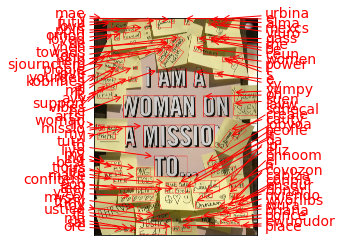


[Tesseract]
| Up : - & c |

B.

iO ES

aS

the

- "ae

MAY

ON et



cH

MISSIO!

is “y

ti

IL

-,



e

|

——-

eS ee ee ee ee

_—~

Ww

i“

p As he

mL

I

r |

| # eFIye

—

b rol

|

we idl

a NS ae


i


-

LIFE

f

eee ens

,

AKI

feof

LE

bb tl

oe

FEEL

Joc

o

S


Bev voy


OY Bs


Wse

—@Q

eliz

= Y¥\

|

OV >


cove lo

ae

.

ee.

ea

_ = —

KS

\ 4

U

oP

lace

4

(Ga,

A |

|

\e

\

a

a —

ON ATL

Niviendo

¢)

“d

Briang,

“Yonc #

Ecuador

ee

Done


In [20]:
compare_ocr('7.jpg')

[keras-ocr]


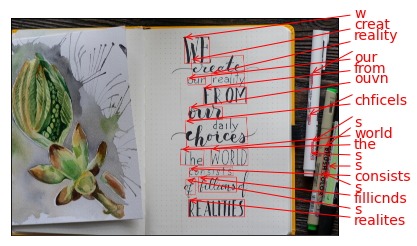


[Tesseract]
‘


’

|


z

cm


’



Z


.

:

¢


=


|

Done


In [21]:
compare_ocr('2.jpg')

[keras-ocr]


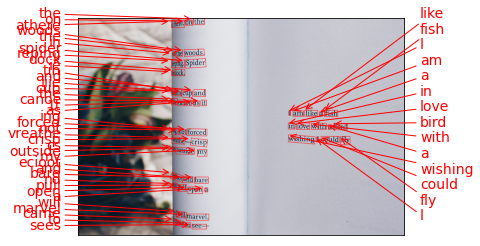


[Tesseract]
|

dtm

like

ad

fish

in

love

with

d

bird

wishing

|

could

fly


Done


In [22]:
compare_ocr('6.jpg')

[keras-ocr]


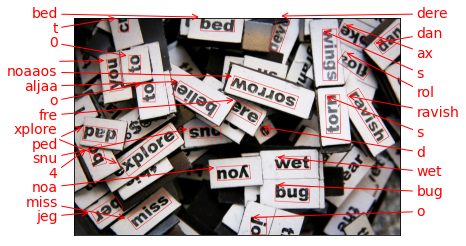


[Tesseract]

Done


In [23]:
compare_ocr('3.jpg')

# 회고

- [https://unsplash.com/s/photos/words](https://unsplash.com/s/photos/words) 이미지의 출처이다.
- OCR을 직접 해보니 재미있을 것 같았지만 무언가 싱겁게 끝나고 간단히 API라든지 모듈을 불러와서 짧게나마 끝난 기분이라 시시(?)했다.
- 사실 결과도 그리 만족하지 못한다. 보이저엑스 회사의 OCR이 생각났다.
- 결과를 보면 아쉽게도 Google Cloud API는 사용하지 못했지만 성능이 좋다고 알려져 있는 것 같고, 다음으로 keras-OCR, Tesseract인거 같다.
- 글자가 뒤집힌 경우는 그대로 찾으려고 하는 것 같아 아쉽다.
- 작은 글자도 잡히는게 놀라웠다.
- 무언가 더 성능이 좋은 모델을 갈구하게 된다...